## Transfer Learning Inception V3 using Keras

Please download the dataset from the below url

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [6]:
import splitfolders
input_folder= "C:\\Users\\javed\\Desktop\\resized\\input\\Data"
output= "C:\\Users\\javed\\Desktop\\resized\\input\\pre-processed"
splitfolders.ratio(input_folder,output,seed=42,ratio=(.6,.2,.2))

In [9]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = "C:\\Users\\javed\\Desktop\\resized\\input\\pre-processed\\train"
valid_path = "C:\\Users\\javed\\Desktop\\resized\\input\\pre-processed\\val"


In [10]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




87924736/87910968 [==============================] - 24s 0us/step


In [12]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [17]:
  # useful for getting number of output classes
folders = glob('C:\\Users\\javed\\Desktop\\resized\\input\\pre-processed\\train\\*')

In [18]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [19]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [20]:

# view the structure of the model
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                           

In [21]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [22]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [23]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('C:\\Users\\javed\\Desktop\\resized\\input\\pre-processed\\train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 484 images belonging to 4 classes.


In [24]:
test_set = test_datagen.flow_from_directory('C:\\Users\\javed\\Desktop\\resized\\input\\pre-processed\\test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 163 images belonging to 4 classes.


In [25]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\javed\AppData\Local\Temp\ipykernel_11964\4130870686.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/20
16/16 [==============================] - 67s 4s/step - loss: 7.9067 - accuracy: 0.4773 - val_loss: 3.2219 - val_accuracy: 0.5767
Epoch 2/20
16/16 [==============================] - 67s 4s/step - loss: 1.7183 - accuracy: 0.7645 - val_loss: 1.6408 - val_accuracy: 0.7669
Epoch 3/20
16/16 [==============================] - 66s 4s/step - loss: 0.7365 - accuracy: 0.8616 - val_loss: 1.3962 - val_accuracy: 0.7791
Epoch 4/20
16/16 [==============================] - 69s 4s/step - loss: 0.5434 - accuracy: 0.8988 - val_loss: 1.1254 - val_accuracy: 0.8221
Epoch 5/20
16/16 [==============================] - 66s 4s/step - loss: 0.3240 - accuracy: 0.9256 - val_loss: 1.2452 - val_accuracy: 0.8160
Epoch 6/20
16/16 [==============================] - 64s 4s/step - loss: 0.3231 - accuracy: 0.9256 - val_loss: 1.0433 - val_accuracy: 0.8344
Epoch 7/20
16/16 [==============================] - 64s 4s/step - loss: 0.2004 - accuracy: 0.9483 - val_loss: 1.0327 - val_accuracy: 0.8466
Epoch 8/20
16/16 [==

In [26]:
import matplotlib.pyplot as plt

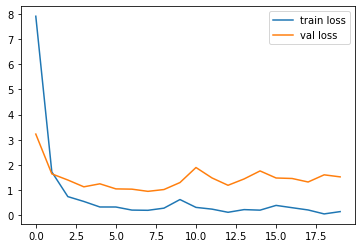

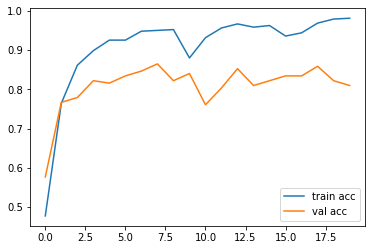

<Figure size 432x288 with 0 Axes>

In [27]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [28]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('C:\\Users\\javed\\Desktop\\resized\\newmodel_inception.h5')

In [29]:

y_pred = model.predict(test_set)


In [30]:
y_pred

array([[1.48169920e-01, 5.78111781e-10, 4.02667986e-15, 8.51830065e-01],
       [5.41017167e-02, 5.02117532e-12, 1.23204757e-07, 9.45898175e-01],
       [9.99529123e-01, 5.79578906e-15, 7.09290832e-18, 4.70913976e-04],
       [5.37135172e-08, 2.69845479e-08, 1.00000000e+00, 4.54143878e-09],
       [9.82808042e-03, 3.76154759e-07, 6.49151044e-09, 9.90171611e-01],
       [6.35975957e-05, 4.83550298e-17, 2.49185899e-13, 9.99936342e-01],
       [1.36495984e-07, 6.81346636e-27, 4.82359887e-23, 9.99999881e-01],
       [1.72505586e-03, 9.98274922e-01, 5.45289334e-21, 1.66773425e-20],
       [4.64791584e-15, 1.00000000e+00, 3.84113446e-23, 9.42149598e-27],
       [2.00286536e-06, 9.99997973e-01, 4.65386661e-23, 7.58743246e-18],
       [1.00000000e+00, 4.22747277e-23, 9.31977117e-18, 6.30889065e-17],
       [1.00000000e+00, 5.59015230e-11, 1.56107560e-12, 9.42939837e-10],
       [1.00000000e+00, 2.94798779e-16, 5.02133925e-12, 1.16789824e-13],
       [2.13411617e-08, 1.00000000e+00, 2.92466329e

In [31]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [32]:
y_pred

array([3, 3, 0, 2, 3, 3, 3, 1, 1, 1, 0, 0, 0, 1, 2, 1, 2, 2, 0, 0, 0, 3,
       3, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0, 0, 0, 0, 1, 0,
       0, 0, 2, 3, 0, 2, 0, 1, 3, 0, 0, 0, 1, 2, 1, 3, 0, 0, 1, 2, 3, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 3, 1, 0, 0, 1, 3, 0, 3, 0, 0, 0, 0, 0, 1,
       0, 1, 3, 0, 0, 3, 0, 3, 0, 2, 0, 1, 1, 0, 0, 1, 3, 2, 0, 1, 3, 0,
       0, 2, 0, 0, 3, 0, 3, 0, 0, 1, 3, 3, 0, 2, 1, 1, 0, 3, 0, 1, 0, 1,
       3, 1, 0, 3, 3, 2, 2, 0, 0, 0, 1, 3, 2, 2, 0, 3, 0, 2, 0, 0, 0, 3,
       0, 0, 0, 1, 3, 3, 0, 0, 2], dtype=int64)

In [33]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [34]:
model=load_model('C:\\Users\\javed\\Desktop\\resized\\newmodel_inception.h5')

In [33]:
img_data

NameError: name 'img_data' is not defined

In [ ]:
img=image.load_img('Datasets/Test/Coffee/download (2).jpg',target_size=(224,224))



In [ ]:
x=image.img_to_array(img)
x

array([[[254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.],
        ...,
        [254., 254., 254.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.],
        ...,
        [254., 254., 254.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.],
        ...,
        [254., 254., 254.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

array([[0.9745471, 0.0254529]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
a==1

array([ True])

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.2.0'